<a href="https://colab.research.google.com/github/SHAZAN01/Machine-Learning/blob/main/SVR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Learning Objective-

Support Vector Regressor

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

In [ ]:
# To connect the colab to your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Loading

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CFI DA A 23/Machine Learning/Datasets/Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Input & Target Seperation

In [ ]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
y = y.reshape(len(y),1)

Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

Applying the Model

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Model Prediction

In [ ]:
# pass a scale transformed value in 2D to predict y
# regressor.predict(sc_x.transform([[3]]))

# Should inverse transform to get the original output from the scaled output
sc_y.inverse_transform(regressor.predict(sc_x.transform([[8.5]])).reshape(-1,1))

array([[403162.81672181]])

Data Visualization

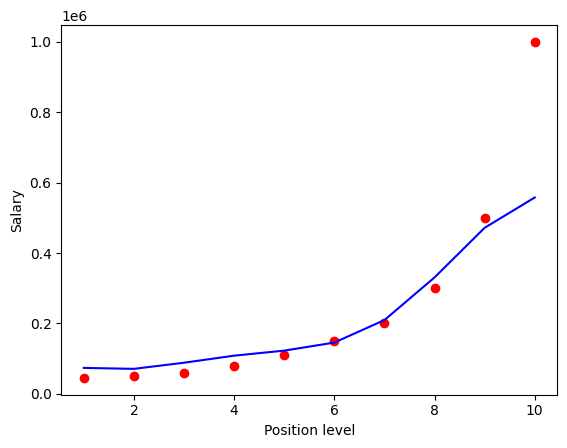

In [ ]:
# plot between original_X Vs scaled_y
# inverse transform is applied to get back to original scale. (Note: Scaling was applied only for model fitting)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')

# plot between Original_X Vs Original version of predicted y
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Performance Metrics

In [ ]:
y = sc_y.inverse_transform(y)
y_pred = sc_y.inverse_transform((regressor.predict(x).reshape(-1,1)))

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y,y_pred)
mse=mean_squared_error(y,y_pred)
mae=mean_absolute_error(y,y_pred)
rmse=np.sqrt(mean_squared_error(y,y_pred))
print(r2,mse,mae,rmse)

0.7516001070620798 20036494264.131752 63332.39208968966 141550.32413997417


Task:

Perform other visualizations, application of other models and compare if necessary